In [ ]:

import pandas as pd

apps_with_duplicates = pd.read_csv("/content/apps.csv")

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 entries
n=5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6849,7909,BayPort CU Mobile Banking,FINANCE,4.7,2374,16M,"10,000+",Free,0,Everyone,Finance,"July 31, 2018",5.10.1.0,5.0 and up
7716,8833,DS-11 form,BUSINESS,NaN,3,28M,100+,Free,0,Everyone,Business,"April 27, 2018",1.7.7,4.1 and up
2372,3035,Golf GPS Rangefinder: Golf Pad,SPORTS,4.6,13098,NaN,"1,000,000+",Free,0,Everyone,Sports,"July 28, 2018",Varies with device,Varies with device
6625,7684,CP HAPPS - Pittsburgh Events,LIFESTYLE,3.8,85,5.6M,"5,000+",Free,0,Teen,Lifestyle,"March 6, 2015",1.18.10,4.0.3 and up
5409,6418,あなカレ【BL】無料ゲーム,FAMILY,4.7,6073,8.5M,"100,000+",Free,0,Mature 17+,Simulation,"February 25, 2018",4.2.2,2.3 and up


# Data cleaning

In [ ]:
import re

chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

# Create regex pattern to remove unwanted characters
pattern = '[' + re.escape(''.join(chars_to_remove)) + ']'

for col in cols_to_clean:
    # Convert column to string first, handle NaNs
    apps[col] = apps[col].astype(str).str.replace(pattern, '', regex=True)

    # Convert cleaned column to numeric, coerce errors to NaN
    apps[col] = pd.to_numeric(apps[col], errors='coerce')

# Exploring app categories

In [ ]:
# If not installed yet
# !pip install plotly

import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd

# Make sure your DataFrame 'apps' exists
# Example: apps = pd.read_csv("/content/googleplaystore.csv")

# Enable Plotly display in Colab
pio.renderers.default = 'colab'

# Get unique category count
num_categories = apps['Category'].nunique()
print(f'Number of categories = {num_categories}')

# Count and sort number of apps per category
category_counts = apps['Category'].value_counts().sort_values(ascending=False)

# Create bar chart
trace = go.Bar(
    x=category_counts.index,
    y=category_counts.values,
    marker=dict(color='rgba(55, 128, 191, 0.7)')
)

layout = go.Layout(
    title='Number of Apps by Category',
    xaxis=dict(title='Category', tickangle=45),
    yaxis=dict(title='Number of Apps'),
    margin=dict(b=150)
)

fig = go.Figure(data=[trace], layout=layout)

# ✅ Correct display method for Colab
fig.show()


Number of categories = 33


# Distribution of app ratings

In [ ]:
# If not installed yet
# !pip install plotly

import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd

# Example: make sure your dataframe exists
# apps = pd.read_csv("/content/googleplaystore.csv")

# Calculate average rating
avg_app_rating = apps['Rating'].mean()
print(f'Average app rating = {avg_app_rating:.2f}')

# Create histogram
hist = go.Histogram(
    x=apps['Rating'],
    xbins=dict(start=1, end=5, size=0.1),
    marker=dict(color='rgba(100, 149, 237, 0.7)'),
    opacity=0.75
)

# Layout with average line
layout = go.Layout(
    title='Distribution of App Ratings',
    xaxis=dict(title='Rating'),
    yaxis=dict(title='Number of Apps'),
    shapes=[
        dict(
            type='line',
            x0=avg_app_rating,
            y0=0,
            x1=avg_app_rating,
            y1=apps['Rating'].value_counts().max(),
            line=dict(color='red', dash='dashdot', width=2)
        )
    ],
    annotations=[
        dict(
            x=avg_app_rating,
            y=apps['Rating'].value_counts().max(),
            text=f'Avg: {avg_app_rating:.2f}',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        )
    ]
)

fig = go.Figure(data=[hist], layout=layout)

# Correct display for Colab
pio.renderers.default = 'colab'
fig.show()


Average app rating = 4.17


#  Size and price of an app

<Figure size 800x600 with 0 Axes>

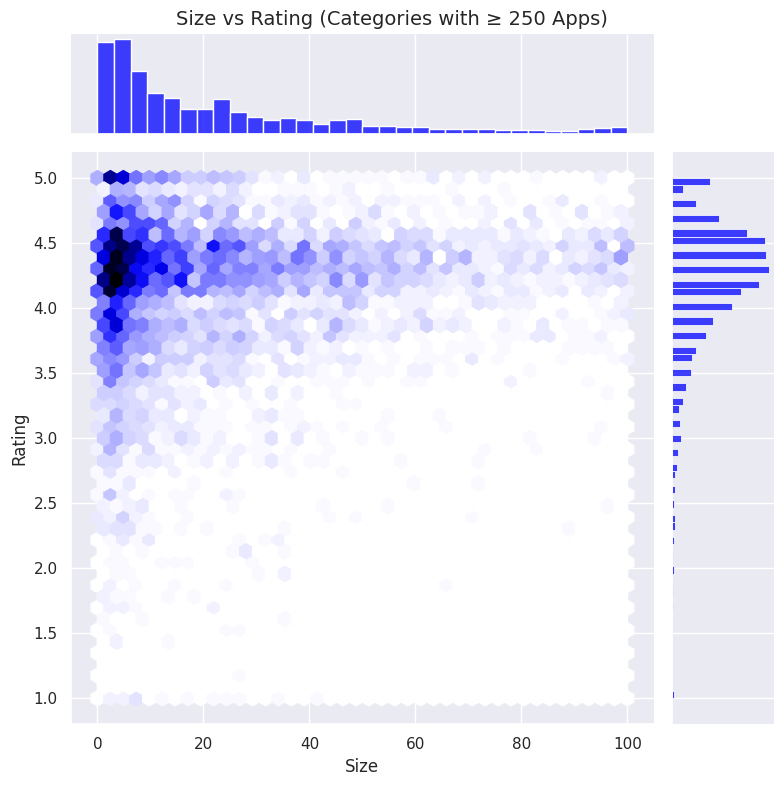

<Figure size 800x600 with 0 Axes>

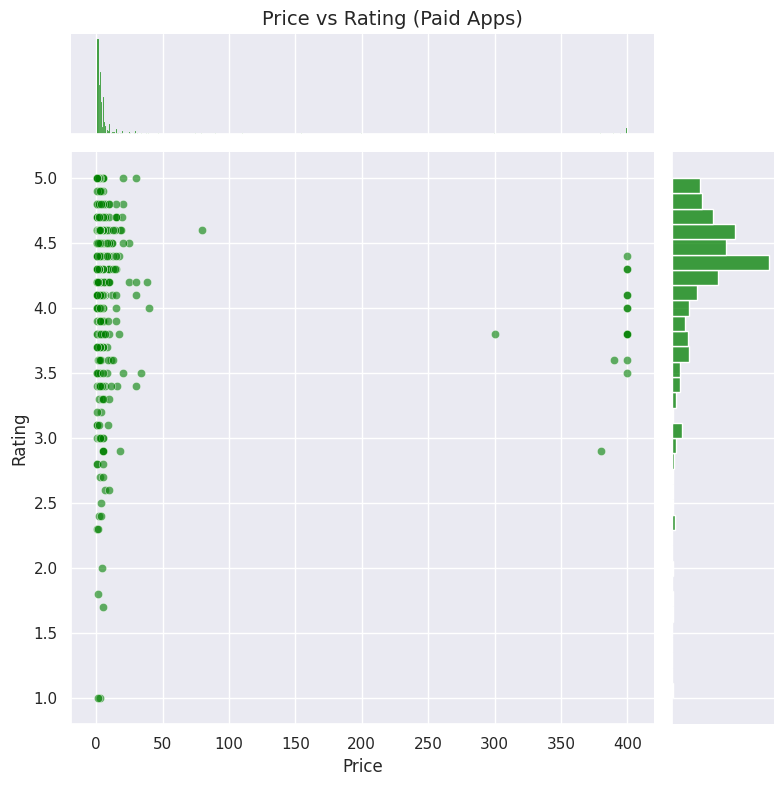

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Set plot style and ignore warnings
sns.set_theme(style="darkgrid")  # updated from set_style
warnings.filterwarnings("ignore")

# Filter categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250)

# --- Plot 1: App Size vs Rating (for large categories) ---
plt.figure(figsize=(8, 6))
plot_size_rating = sns.jointplot(
    data=large_categories,
    x='Size',
    y='Rating',
    kind='hex',
    height=8,
    color='blue'
)
plot_size_rating.fig.suptitle('Size vs Rating (Categories with ≥ 250 Apps)', fontsize=14)
plot_size_rating.fig.tight_layout()
plot_size_rating.fig.subplots_adjust(top=0.95)

# --- Plot 2: Price vs Rating (Paid apps only) ---
paid_apps = apps[apps['Type'] == 'Paid']

plt.figure(figsize=(8, 6))
plot_price_rating = sns.jointplot(
    data=paid_apps,
    x='Price',
    y='Rating',
    kind='scatter',
    height=8,
    color='green',
    alpha=0.6
)
plot_price_rating.fig.suptitle('Price vs Rating (Paid Apps)', fontsize=14)
plot_price_rating.fig.tight_layout()
plot_price_rating.fig.subplots_adjust(top=0.95)


# Relation between app category and app price¶

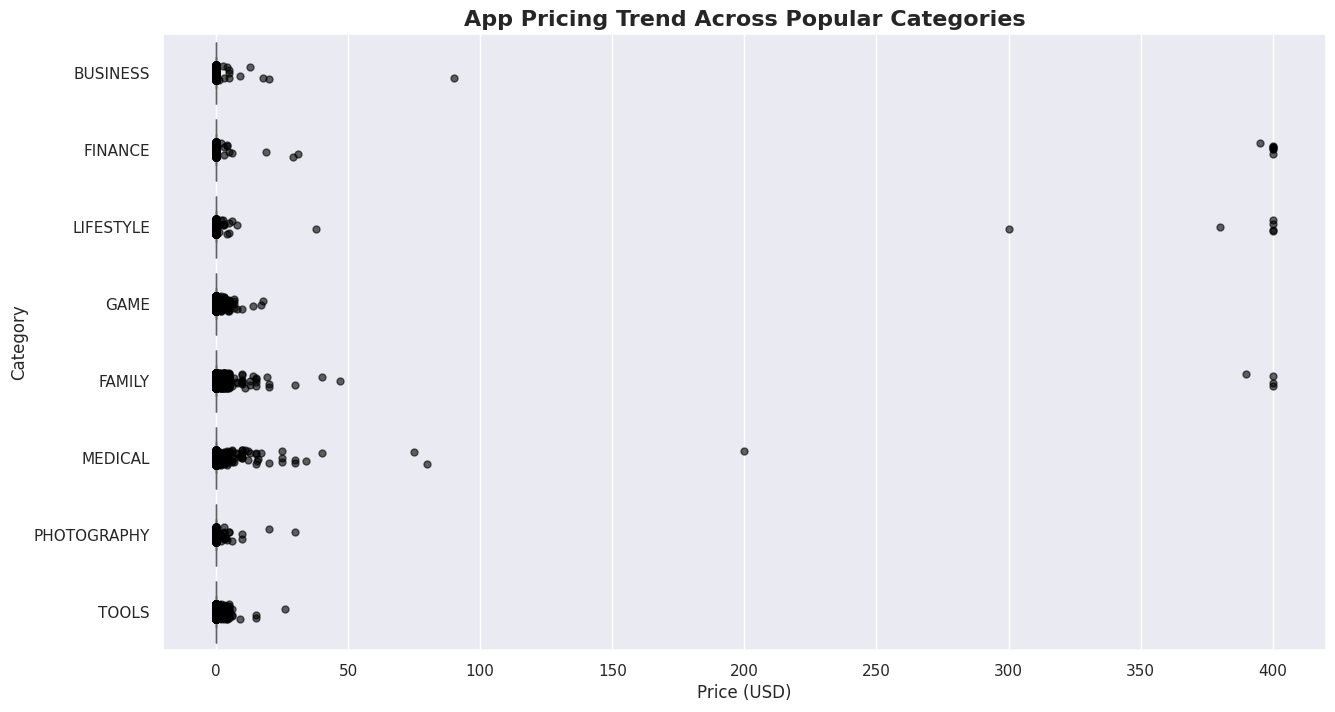

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 8))

# Select a few popular app categories
popular_app_cats = apps[apps['Category'].isin([
    'GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL',
    'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'
])]

# Plot price trends using both boxplot and stripplot for better visualization
sns.boxplot(x='Price', y='Category', data=popular_app_cats, whis=1.5, fliersize=0, palette="Set3")
sns.stripplot(x='Price', y='Category', data=popular_app_cats,
              jitter=True, linewidth=1, alpha=0.6, color="black")

# Titles and labels
plt.title('App Pricing Trend Across Popular Categories', fontsize=16, weight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Show the plot
plt.show()

# Extract apps priced above $200
apps_above_200 = popular_app_cats.loc[popular_app_cats['Price'] > 200, ['Category', 'App', 'Price']]
apps_above_200


# Filter out "junk" apps

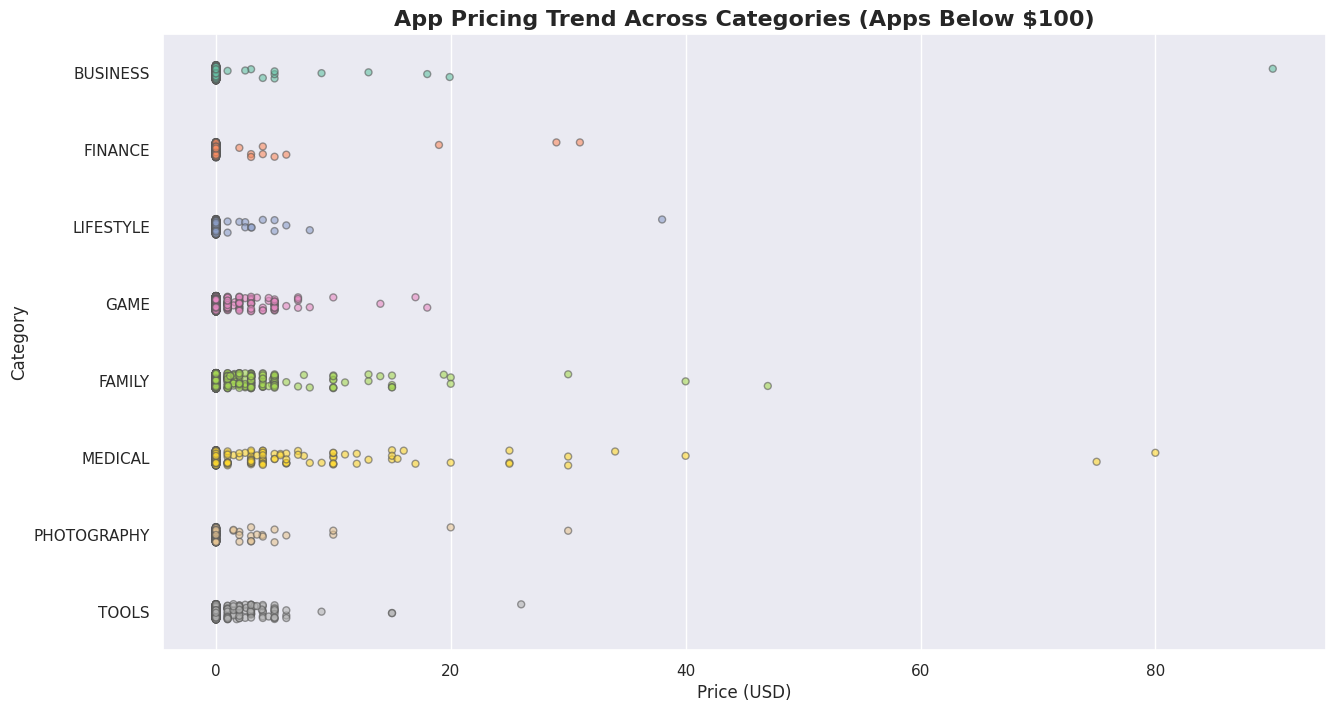

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

# Create figure
plt.figure(figsize=(15, 8))

# Plot stripplot for price vs category
sns.stripplot(
    x='Price',
    y='Category',
    data=apps_under_100,
    jitter=True,
    linewidth=1,
    alpha=0.6,          # transparency for better readability
    palette="Set2"      # nicer color palette
)

# Titles and labels
plt.title('App Pricing Trend Across Categories (Apps Below $100)', fontsize=16, weight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Show plot
plt.show()


# Popularity of paid apps vs free apps

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd

# Example: make sure your dataset exists
# apps = pd.read_csv("/content/googleplaystore.csv")

# Create box plots
trace0 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name='Paid'
)

trace1 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Free'],
    name='Free'
)

layout = go.Layout(
    title="Number of Downloads of Paid Apps vs Free Apps",
    yaxis=dict(
        type='log',   # Log scale for better visualization
        autorange=True
    )
)

fig = go.Figure(data=[trace0, trace1], layout=layout)

# ✅ Fix for Google Colab:
import plotly.io as pio
pio.renderers.default = 'colab'

fig.show()


Sentiment analysis of user reviews¶

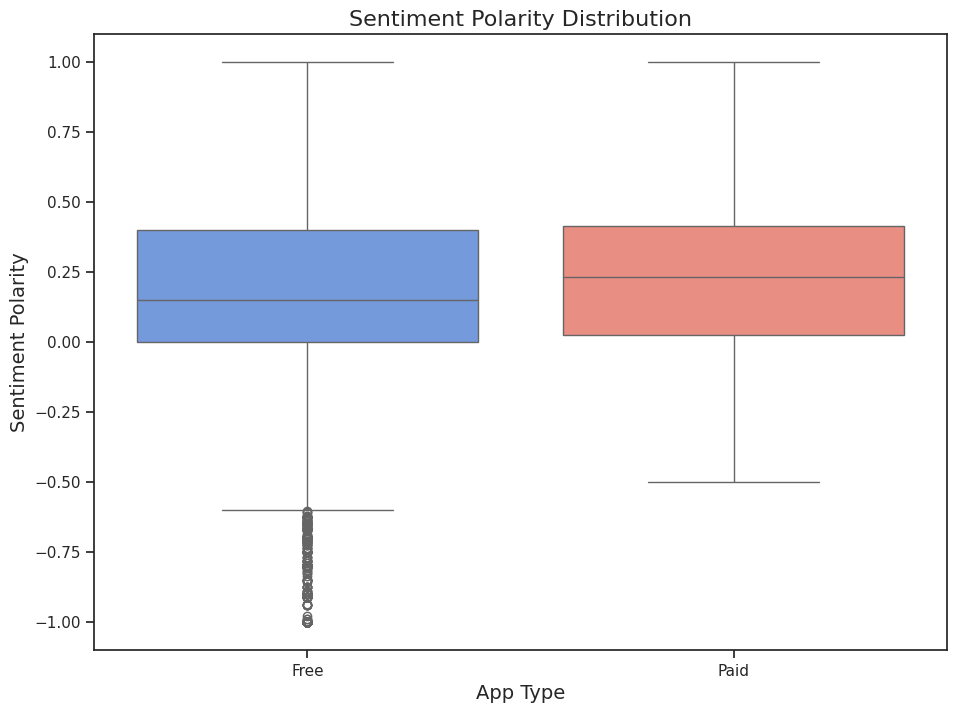

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv("/content/user_reviews.csv")

# Merge apps and reviews
merged_df = pd.merge(apps, reviews_df, on='App', how="inner")

# Drop NA values
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

# Set style
sns.set_style('ticks')

# Plot
fig, ax = plt.subplots(figsize=(11, 8))

# Boxplot with different colors
sns.boxplot(
    x='Type',
    y='Sentiment_Polarity',
    data=merged_df,
    palette={'Paid':'salmon', 'Free':'cornflowerblue'}  # Different colors for each type
)

# Title and labels
ax.set_title('Sentiment Polarity Distribution', fontsize=16)
ax.set_xlabel('App Type', fontsize=14)
ax.set_ylabel('Sentiment Polarity', fontsize=14)

plt.show()

# Recommendation

Integrate Sentiment Scores into Recommendation Models: Combine sentiment polarity scores with collaborative filtering methods to refine app recommendations. This hybrid approach can improve prediction accuracy by incorporating user emotions alongside traditional ratings.
PMC

Implement Aspect-Based Sentiment Analysis: Utilize aspect-based sentiment analysis to extract specific features (e.g., UI, performance) from reviews. This granularity allows for more targeted recommendations, addressing user preferences on particular app attributes.
arXiv

Enhance Model Explainability with Sentiment Insights: Incorporate sentiment-based explanations into your recommendation system. Providing users with insights into why certain apps are recommended based on review sentiments can increase trust and user satisfaction